### Notebook showing basic usage of the grid class 

Start by importing basic modules. The grid class is based around xarray, so this is required

In [21]:
import numpy as np
import xarray as xr
import fmsutils as fmu
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook

Define the parameters of your system (using K2-18b with solar metallicity right now, default values are Earth):

In [10]:
R_p = 6371e3*2.6 # Planetary radius (m)
R   = 3779       # Gas constant (J/kg/K)
g   = 12.43      # Gravitational field strength (m/s^2)
pref = 1e6       # Surface reference pressure (Pa), used for interpolation to constant pressure levels

Now load the basic xarray dataset, and setup a new instance of the grid class. The dataset will be stored in the class attribute `Grid.data`. Note `grid_xt` and `grid_yt` are automatically renamed `lon` and `lat`

In [11]:
root = '/network/group/aopp/planetary/RTP022_INNES_MOISTEXO/mnsuite/PKfullS/15000/atmos_daily.nc'

dataset = xr.load_dataset(root, decode_times=False).isel(time=slice(-10,None,None))
Grid = fmu.grid(dataset, R=R, R_p=R_p, g=g, pref=pref)

In [12]:
Grid.data

<xarray.Dataset>
Dimensions:      (lat: 92, lon: 192, pf_int: 50, pf_level: 50, pfull: 50, ph_int: 51, ph_level: 51, phalf: 51, scalar_axis: 1, time: 10)
Coordinates:
  * time         (time) float64 1.491e+04 1.492e+04 ... 1.499e+04 1.5e+04
  * lat          (lat) float64 -89.02 -87.07 -85.11 -83.15 ... 85.11 87.07 89.02
  * lon          (lon) float64 0.9375 2.812 4.688 6.563 ... 355.3 357.2 359.1
  * pfull        (pfull) float64 0.1098 0.132 0.1587 ... 1.339e+03 1.243e+03
  * phalf        (phalf) float64 0.1 0.1202 0.1446 ... 1.17e+03 1.524e+03 1e+03
  * scalar_axis  (scalar_axis) float64 0.0
  * ph_level     (ph_level) float64 0.5 1.5 2.5 3.5 4.5 ... 47.5 48.5 49.5 50.5
  * pf_level     (pf_level) int64 1 2 3 4 5 6 7 8 9 ... 43 44 45 46 47 48 49 50
  * ph_int       (ph_int) float32 10.01 12.04 14.48 ... 5.478e+05 7.75e+05 1e+06
  * pf_int       (pf_int) float32 10.99 13.22 15.9 ... 6.549e+05 8.827e+05
Data variables: (12/17)
    ps           (time, lat, lon) float32 1e+06 1e+06 1e+06 ... 1e+06 1e+06
    temp         (time, pfull, lat, lon) float32 236.2 236.2 ... 532.3 532.3
    ts           (time, lat, lon) float32 532.3 532.3 532.3 ... 532.3 532.3
    height       (time, pfull, lat, lon) float32 1.151e+06 1.151e+06 ... 0.0 0.0
    ucomp        (time, pfull, lat, lon) float32 -43.7 -42.85 ... 0.2444 0.2385
    vcomp        (time, pfull, lat, lon) float32 -30.69 -31.47 ... -0.2853
    ...           ...
    vapour_col   (time, lat, lon) float32 8.045e+03 8.045e+03 ... 8.045e+03
    bk           (phalf) float32 1e-08 1.445e-08 2.089e-08 ... 0.4786 0.6918 1.0
    pk           (phalf) float32 10.0 12.02 14.45 ... 6.918e+04 8.318e+04 0.0
    vapour_glob  (time, scalar_axis) float32 8.045e+03 8.045e+03 ... 8.045e+03
    p_half       (time, ph_level, lat, lon) float32 10.01 10.01 ... 1e+06 1e+06
    p_full       (time, pf_level, lat, lon) float32 10.99 10.99 ... 8.827e+05
Attributes:
    filename:                   atmos_daily.tile1.nc
    title:                      Cubed-Sphere_C48
    grid_type:                  regular
    grid_tile:                  N/A
    history:                    Sat Apr 10 20:11:57 2021: ncks -A -v vapour_g...
    code_version:               $Name: riga $
    history_of_appended_files:  Sat Apr 10 20:11:57 2021: Appended file atmos...
    NCO:                        4.7.2

What can you use the grid class for? First, let's interpolate some of the data to constant pressure levels. You can either use the class method `grid.interp_vars([comma separated list of variable names])` or `grid.interp_all()` which will interpolate all your variables (but may take a long time). This method automatically knows which variables to interpolate to interface/full pressure levels, and replaces the vertical coordinate with either `pf_int` or `ph_int`

In [15]:
Grid.interp_vars('temp', 'ucomp', 'vcomp')
Grid.data

<xarray.Dataset>
Dimensions:      (lat: 92, lon: 192, pf_int: 50, pf_level: 50, pfull: 50, ph_int: 51, ph_level: 51, phalf: 51, scalar_axis: 1, time: 10)
Coordinates:
  * time         (time) float64 1.491e+04 1.492e+04 ... 1.499e+04 1.5e+04
  * lat          (lat) float64 -89.02 -87.07 -85.11 -83.15 ... 85.11 87.07 89.02
  * lon          (lon) float64 0.9375 2.812 4.688 6.563 ... 355.3 357.2 359.1
  * pfull        (pfull) float64 0.1098 0.132 0.1587 ... 1.339e+03 1.243e+03
  * phalf        (phalf) float64 0.1 0.1202 0.1446 ... 1.17e+03 1.524e+03 1e+03
  * scalar_axis  (scalar_axis) float64 0.0
  * ph_level     (ph_level) float64 0.5 1.5 2.5 3.5 4.5 ... 47.5 48.5 49.5 50.5
  * pf_level     (pf_level) int64 1 2 3 4 5 6 7 8 9 ... 43 44 45 46 47 48 49 50
  * ph_int       (ph_int) float32 10.01 12.04 14.48 ... 5.478e+05 7.75e+05 1e+06
  * pf_int       (pf_int) float32 10.99 13.22 15.9 ... 6.549e+05 8.827e+05
Data variables: (12/17)
    ps           (time, lat, lon) float32 1e+06 1e+06 1e+06 ... 1e+06 1e+06
    temp         (time, pf_int, lat, lon) float32 236.2 236.2 ... 532.3 532.3
    ts           (time, lat, lon) float32 532.3 532.3 532.3 ... 532.3 532.3
    height       (time, pfull, lat, lon) float32 1.151e+06 1.151e+06 ... 0.0 0.0
    ucomp        (time, pf_int, lat, lon) float32 -43.7 -42.85 ... 0.2444 0.2385
    vcomp        (time, pf_int, lat, lon) float32 -30.69 -31.47 ... -0.2853
    ...           ...
    vapour_col   (time, lat, lon) float32 8.045e+03 8.045e+03 ... 8.045e+03
    bk           (phalf) float32 1e-08 1.445e-08 2.089e-08 ... 0.4786 0.6918 1.0
    pk           (phalf) float32 10.0 12.02 14.45 ... 6.918e+04 8.318e+04 0.0
    vapour_glob  (time, scalar_axis) float32 8.045e+03 8.045e+03 ... 8.045e+03
    p_half       (time, ph_level, lat, lon) float32 10.01 10.01 ... 1e+06 1e+06
    p_full       (time, pf_level, lat, lon) float32 10.99 10.99 ... 8.827e+05
Attributes:
    filename:                   atmos_daily.tile1.nc
    title:                      Cubed-Sphere_C48
    grid_type:                  regular
    grid_tile:                  N/A
    history:                    Sat Apr 10 20:11:57 2021: ncks -A -v vapour_g...
    code_version:               $Name: riga $
    history_of_appended_files:  Sat Apr 10 20:11:57 2021: Appended file atmos...
    NCO:                        4.7.2

We can then use some of xarray's easy inbuilt plotting routines to plot the data:

<IPython.core.display.Javascript object>


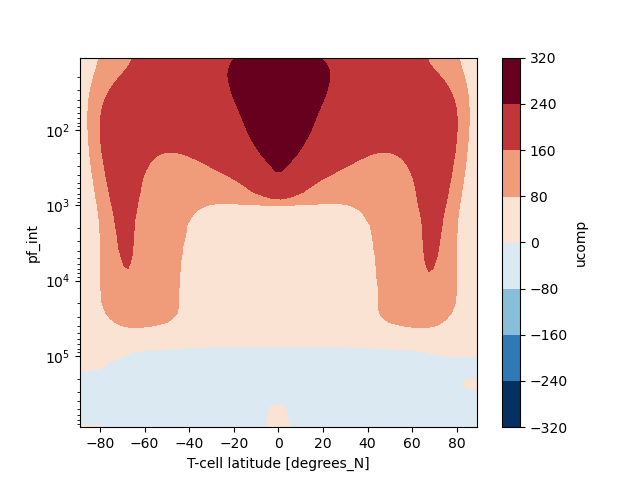

<IPython.core.display.Javascript object>


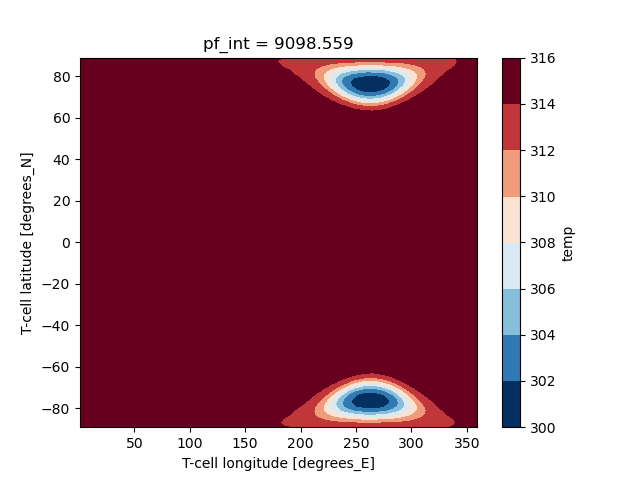

In [24]:
# Plot the zonal mean zonal wind
plt.figure()
Grid.data['ucomp'].mean(('time','lon')).plot.contourf(levels=10, cmap=mpl.cm.RdBu_r)
plt.gca().invert_yaxis()
plt.gca().set_yscale('log')

# Plot the temperature at the 100 mbar level (or level nearest to)
plt.figure()
Grid.data['temp'].mean('time').sel(pf_int=1e4, method='nearest').plot.contourf(levels=10, cmap=mpl.cm.RdBu_r)

Xarray also has some nice functions for easily making grids of plots:

<IPython.core.display.Javascript object>


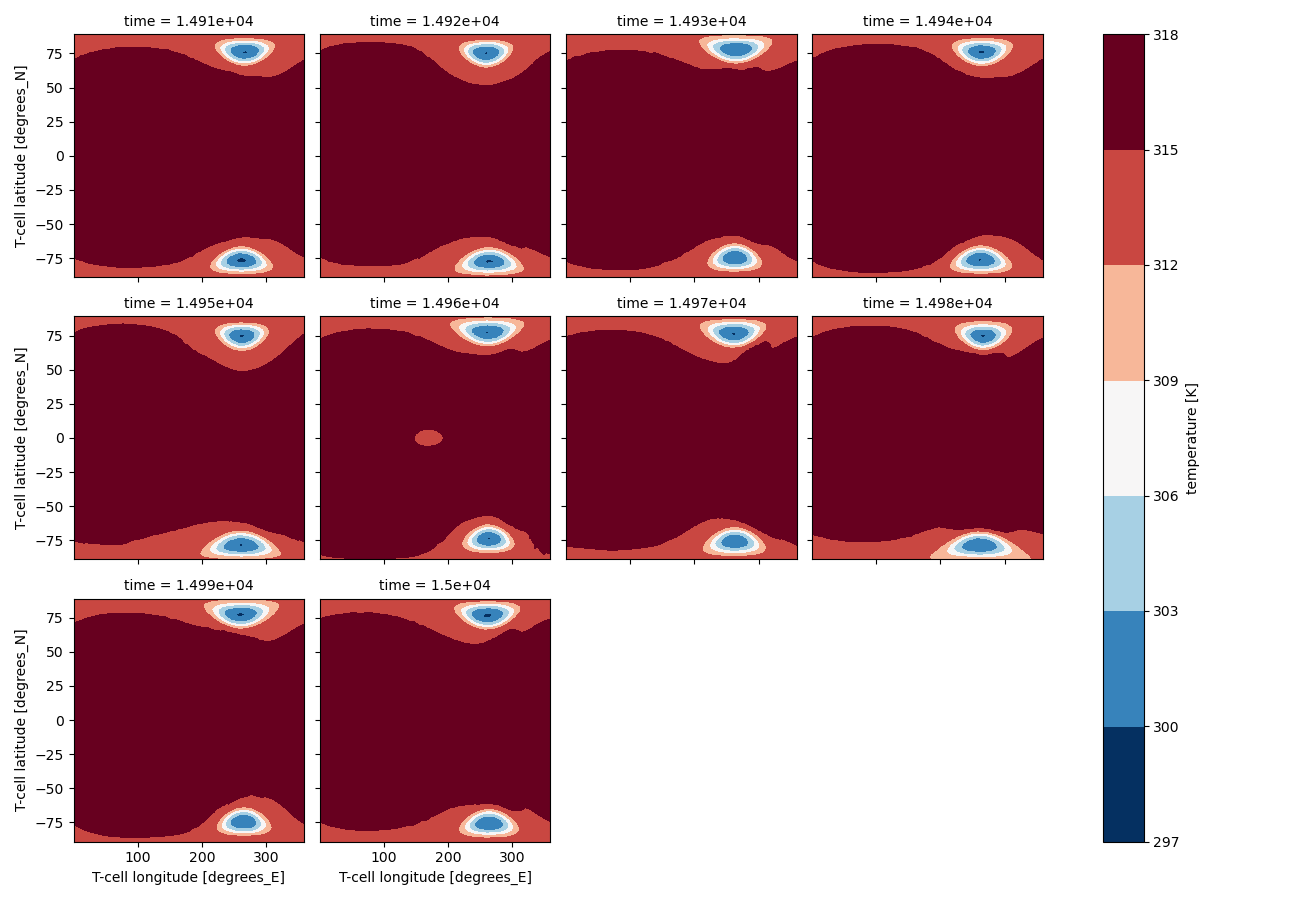

In [31]:
plt.close()

Grid.data['temp'].sel(pf_int=1e4,method='nearest').plot.contourf(col='time',col_wrap=4,cmap=mpl.cm.RdBu_r)

The grid class can calculate mass streamfunctions:

<IPython.core.display.Javascript object>


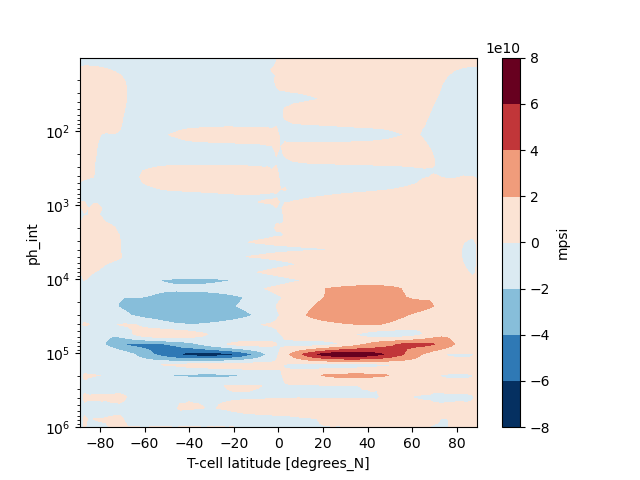

In [38]:
# One call calculates streamfunction and stores it in the xarray variable 'mpsi'
Grid.mpsi()

# Plot results
plt.close()
plt.figure()

Grid.data['mpsi'].mean('time').plot.contourf(cmap=mpl.cm.RdBu_r, y='ph_int',levels=10)
plt.gca().invert_yaxis()
plt.gca().set_yscale('log')

The grid class can also calculate the divergent and rotational components of the wind field (see Lewis & Hammond 2021)

In [40]:
# Calculate divergent and rotational components, and store the results in variables 'udiv, urot, vdiv, vrot'
Grid.calc_divrot()

<IPython.core.display.Javascript object>


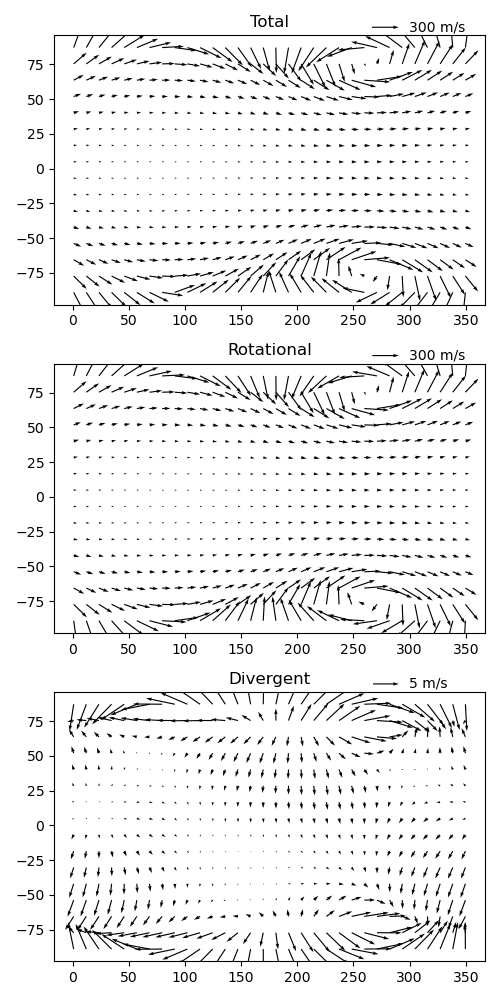

In [68]:
# Plot to show decomposition
n = 6

# Full u, v
u = Grid.data['ucomp'].mean('time').sel(pf_int=1e4,method='nearest')[::n,::n]
v = Grid.data['vcomp'].mean('time').sel(pf_int=1e4,method='nearest')[::n,::n]

# Rotational component
ur = Grid.data['urot'].mean('time').sel(pf_int=1e4,method='nearest')[::n,::n]
vr = Grid.data['vrot'].mean('time').sel(pf_int=1e4,method='nearest')[::n,::n]

# Divergent component
ud = Grid.data['udiv'].mean('time').sel(pf_int=1e4,method='nearest')[::n,::n]
vd = Grid.data['vdiv'].mean('time').sel(pf_int=1e4,method='nearest')[::n,::n]

plt.close()
fig,ax = plt.subplots(3,1,figsize=[5,10])

q0 = ax[0].quiver(Grid.data['lon'][::n], Grid.data['lat'][::n], u, v)
qk0 = ax[0].quiverkey(q0, 0.8, 1.03, 300, '300 m/s',labelpos='E')
ax[0].set_title('Total')

q1 = ax[1].quiver(Grid.data['lon'][::n], Grid.data['lat'][::n], ur, vr)
qk1 = ax[0].quiverkey(q1, 0.8, 1.03, 300, '300 m/s',labelpos='E')
ax[1].set_title('Rotational')

q2 = ax[2].quiver(Grid.data['lon'][::n], Grid.data['lat'][::n], ud, vd)
qk2 = ax[0].quiverkey(q2, 0.8, 1.03, 5, '5 m/s',labelpos='E')
ax[2].set_title('Divergent')

plt.tight_layout()

We can also convert to the tidally locked coordinate system using one function call. The class method `new_TL_grid` creates a new grid class instance with the variables specified in the function call transformed to the TL coordinate. We can add new variables later using the `add_to_TL_grid`. The new grid class will have `lon_TL` and `lat_TL` as its horizontal coordinates

In [69]:
# Specify our new coordinate variables
lon_TL = np.linspace(0,360,60,endpoint=False)
lat_TL = np.linspace(-89,89,30)

# Create tidally locked coordinate grid:
TLGrid = Grid.new_TL_grid(lon_TL, lat_TL, 'temp', 'ucomp', 'vcomp')

In [71]:
TLGrid.data

<xarray.Dataset>
Dimensions:   (lat_TL: 30, lon_TL: 60, pf_int: 50, pf_level: 50, pfull: 50, ph_int: 51, ph_level: 51, phalf: 51, time: 10)
Coordinates:
  * time      (time) float64 1.491e+04 1.492e+04 1.493e+04 ... 1.499e+04 1.5e+04
  * pf_int    (pf_int) float32 10.99 13.22 15.9 ... 6.549e+05 8.827e+05
  * lat_TL    (lat_TL) float64 -89.0 -82.86 -76.72 -70.59 ... 76.72 82.86 89.0
  * lon_TL    (lon_TL) float64 0.0 6.0 12.0 18.0 ... 336.0 342.0 348.0 354.0
  * pfull     (pfull) float64 0.1098 0.132 0.1587 ... 1.339e+03 1.243e+03
  * phalf     (phalf) float64 0.1 0.1202 0.1446 ... 1.17e+03 1.524e+03 1e+03
  * ph_level  (ph_level) float64 0.5 1.5 2.5 3.5 4.5 ... 47.5 48.5 49.5 50.5
  * pf_level  (pf_level) int64 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * ph_int    (ph_int) float32 10.01 12.04 14.48 ... 5.478e+05 7.75e+05 1e+06
Data variables:
    temp      (time, pf_int, lat_TL, lon_TL) float64 236.3 236.3 ... 532.2 532.2
    ps        (time, lat_TL, lon_TL) float64 1e+06 1e+06 1e+06 ... 1e+06 1e+06
    ucomp     (time, pf_int, lat_TL, lon_TL) float64 -230.5 -230.5 ... -0.09753
    vcomp     (time, pf_int, lat_TL, lon_TL) float64 -38.95 -38.95 ... -0.1473
    bk        (phalf) float32 1e-08 1.445e-08 2.089e-08 ... 0.4786 0.6918 1.0
    pk        (phalf) float32 10.0 12.02 14.45 17.38 ... 6.918e+04 8.318e+04 0.0
    p_half    (time, ph_level, lat_TL, lon_TL) float64 10.01 10.01 ... 1e+06
    p_full    (time, pf_level, lat_TL, lon_TL) float64 10.99 10.99 ... 8.827e+05

In [77]:
# Add another variable to the TL grid. This function takes the original grid as its first argument
TLGrid.add_to_TL_grid(Grid,'omega')

In [78]:
TLGrid.data

<xarray.Dataset>
Dimensions:   (lat_TL: 30, lon_TL: 60, pf_int: 50, pf_level: 50, pfull: 50, ph_int: 51, ph_level: 51, phalf: 51, time: 10)
Coordinates:
  * time      (time) float64 1.491e+04 1.492e+04 1.493e+04 ... 1.499e+04 1.5e+04
  * pf_int    (pf_int) float32 10.99 13.22 15.9 ... 6.549e+05 8.827e+05
  * lat_TL    (lat_TL) float64 -89.0 -82.86 -76.72 -70.59 ... 76.72 82.86 89.0
  * lon_TL    (lon_TL) float64 0.0 6.0 12.0 18.0 ... 336.0 342.0 348.0 354.0
  * pfull     (pfull) float64 0.1098 0.132 0.1587 ... 1.339e+03 1.243e+03
  * phalf     (phalf) float64 0.1 0.1202 0.1446 ... 1.17e+03 1.524e+03 1e+03
  * ph_level  (ph_level) float64 0.5 1.5 2.5 3.5 4.5 ... 47.5 48.5 49.5 50.5
  * pf_level  (pf_level) int64 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * ph_int    (ph_int) float32 10.01 12.04 14.48 ... 5.478e+05 7.75e+05 1e+06
Data variables:
    temp      (time, pf_int, lat_TL, lon_TL) float64 236.3 236.3 ... 532.2 532.2
    ps        (time, lat_TL, lon_TL) float64 1e+06 1e+06 1e+06 ... 1e+06 1e+06
    ucomp     (time, pf_int, lat_TL, lon_TL) float64 -230.5 -230.5 ... -0.09753
    vcomp     (time, pf_int, lat_TL, lon_TL) float64 -38.95 -38.95 ... -0.1473
    bk        (phalf) float32 1e-08 1.445e-08 2.089e-08 ... 0.4786 0.6918 1.0
    pk        (phalf) float32 10.0 12.02 14.45 17.38 ... 6.918e+04 8.318e+04 0.0
    p_half    (time, ph_level, lat_TL, lon_TL) float64 10.01 10.01 ... 1e+06
    p_full    (time, pf_level, lat_TL, lon_TL) float64 10.99 10.99 ... 8.827e+05
    omega     (time, pfull, lat_TL, lon_TL) float64 -9.985e-08 ... -0.0002428

We can use this grid like the old one, e.g. for plotting/calculating streamfunctions

<IPython.core.display.Javascript object>


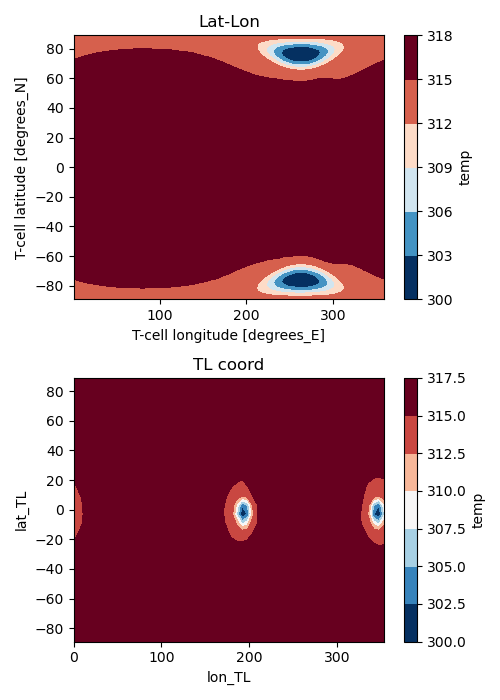

In [95]:
plt.close()
fig,ax = plt.subplots(2,1,figsize=[5,7])

Grid.data['temp'].sel(pf_int=1e4,method='nearest').mean('time').plot.contourf(ax=ax[0],cmap=mpl.cm.RdBu_r)
ax[0].set_title('Lat-Lon')
TLGrid.data['temp'].sel(pf_int=1e4,method='nearest').mean('time').plot.contourf(ax=ax[1],cmap=mpl.cm.RdBu_r)
ax[1].set_title('TL coord')

plt.tight_layout()

<IPython.core.display.Javascript object>


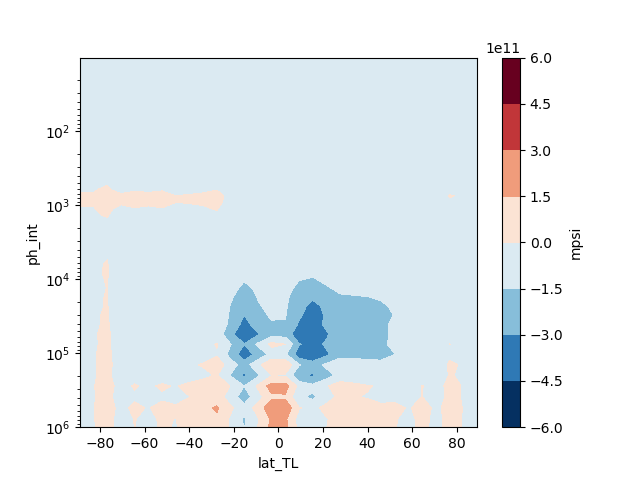

In [83]:
TLGrid.mpsi()

plt.close()
plt.figure()

TLGrid.data['mpsi'].mean('time').plot.contourf(y='ph_int',levels=10,cmap=mpl.cm.RdBu_r)
plt.gca().invert_yaxis()
plt.gca().set_yscale('log')

You can explore the other functions in the source code, and change them if you want. If you install with `pip install -e .` then modifications to the source code will take effect immediately (if you're using a notebook, you have to restart the kernel)